In [0]:
!pip install seaborn

In [0]:
import numpy as np

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.14.0


In [0]:
#from google.colab import files
#files = files.upload()
dataset_path = pd.read_csv('housing.csv')

In [0]:
dataset_path.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [0]:
train_dataset=dataset_path.sample(frac=0.7,random_state=0)
test_dataset=dataset_path.drop(train_dataset.index)

In [0]:
train_stats = train_dataset.describe()
train_stats.pop("medv")
train_stats = train_stats.transpose()

In [0]:
train_labels = train_dataset.pop('medv')
test_labels = test_dataset.pop('medv')

In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

#Model 1 with Learning rate 0.01


In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1,input_shape=[len(train_dataset.keys())])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.01)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model


In [0]:
model=build_model()

In [582]:
model.summary()

Model: "sequential_95"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,206.947145,13.435069,206.947128,247.447729,14.890599,247.447739,95
96,204.561074,13.348787,204.561081,244.635997,14.798952,244.636002,96
97,202.100075,13.256524,202.100067,241.886011,14.708274,241.886002,97
98,199.869580,13.171039,199.869598,239.171232,14.617294,239.171249,98
99,197.702935,13.088311,197.702942,236.422880,14.524026,236.422897,99


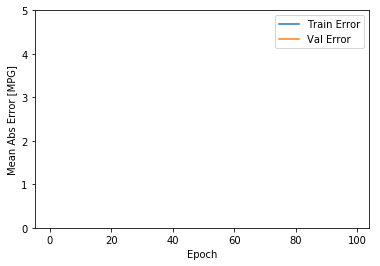

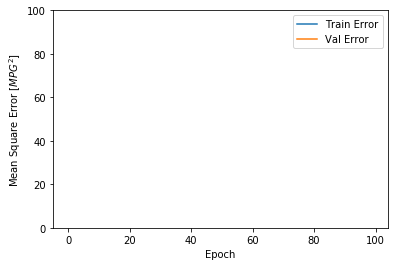

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()
plot_history(history)


....................................................................................................

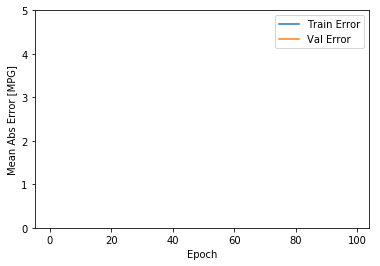

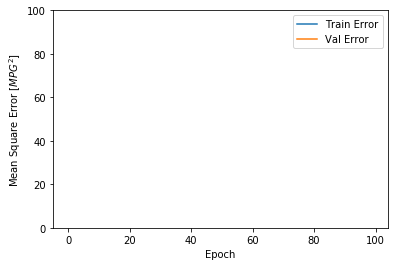

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
early_stop

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error: 13.60 MPG


In [0]:
history.epoch[-1]

99

#Model 2 with learning rate 0.1 (Best Model)

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1,input_shape=[len(train_dataset.keys())])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.1)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model


In [0]:
model=build_model()

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,23.336755,3.394564,23.336756,20.333775,3.042583,20.333775,95
96,23.081800,3.397077,23.081800,19.079501,2.973386,19.079502,96
97,22.948696,3.317266,22.948696,19.327817,2.993608,19.327818,97
98,22.566953,3.338687,22.566954,19.443362,2.986757,19.443363,98
99,23.036778,3.315384,23.036777,20.237454,3.085977,20.237453,99


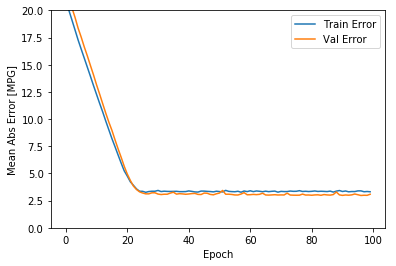

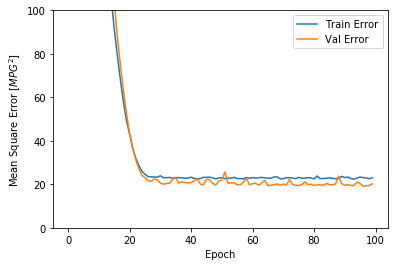

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()
plot_history(history)


..................................................................

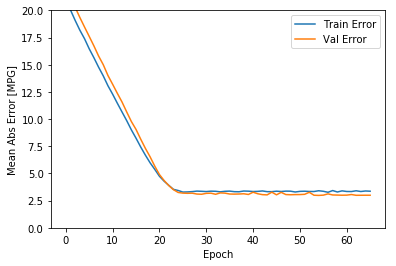

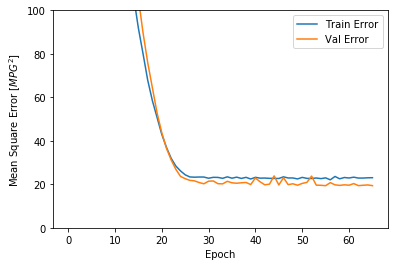

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  3.50 MPG


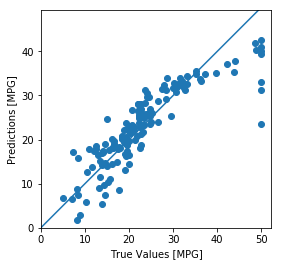

In [0]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

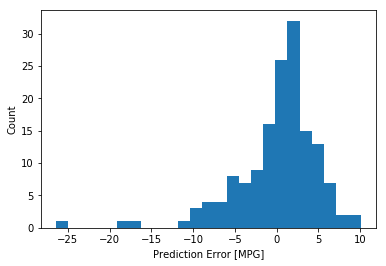

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [0]:
history.epoch[-1]

65

#Model 3 with learning rate 0.8

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1,input_shape=[len(train_dataset.keys())])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.8)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model


In [0]:
model=build_model()

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,39.792100,4.586124,39.792099,48.609195,5.316735,48.609196,95
96,33.603121,4.082777,33.603123,21.631410,3.330535,21.631409,96
97,41.946542,4.471531,41.946545,37.546328,4.260151,37.546329,97
98,42.123854,4.855316,42.123856,22.341365,3.305536,22.341366,98
99,30.258404,3.937779,30.258402,38.535679,4.333310,38.535679,99


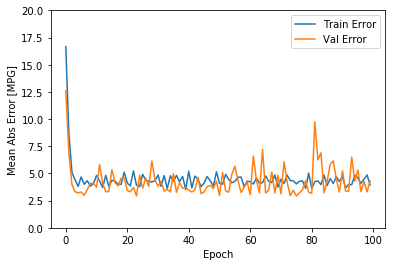

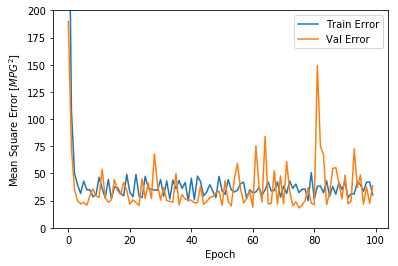

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,200])
  plt.legend()
  plt.show()
plot_history(history)


...............

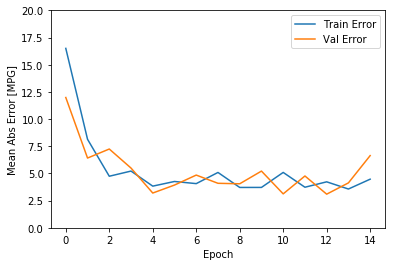

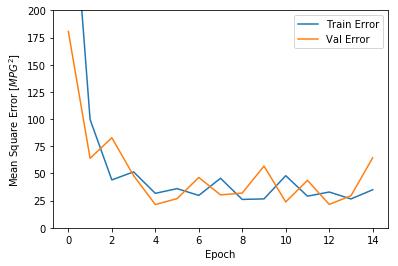

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  7.84 MPG


In [0]:
history.epoch[-1]

14

#Model 4 with learning rate 0.7

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1,input_shape=[len(train_dataset.keys())])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.7)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model


In [0]:
model=build_model()

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,29.788413,3.833379,29.788414,36.936178,4.269671,36.936176,95
96,40.391463,4.710573,40.391464,24.345253,3.245356,24.345255,96
97,31.905570,3.969074,31.905571,21.164690,3.145633,21.164690,97
98,34.824313,4.296992,34.824314,25.638645,3.489424,25.638645,98
99,29.814134,3.913779,29.814137,45.917389,4.987555,45.917393,99


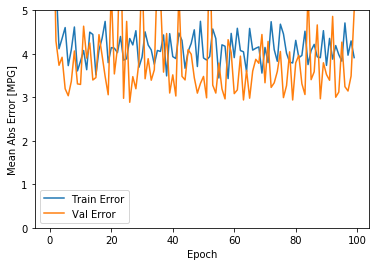

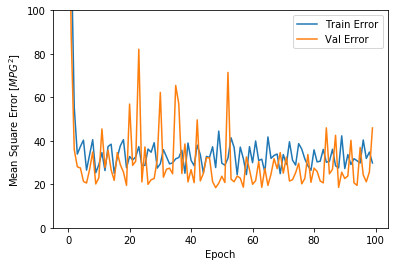

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()
plot_history(history)


.................................................

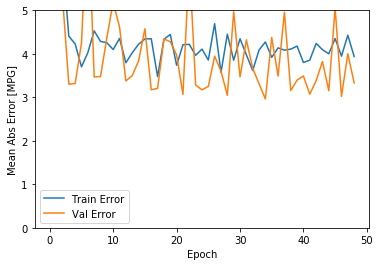

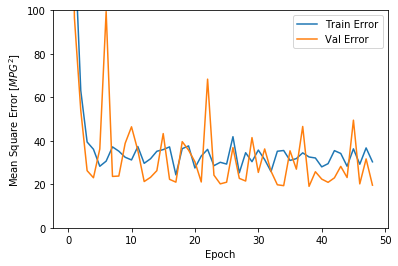

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  3.81 MPG


In [0]:
history.epoch[-1]

48

#Model 5 with learning rate 0.9

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(1,input_shape=[len(train_dataset.keys())])
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.9)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model


In [0]:
model=build_model()

In [0]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [0]:
history = model.fit(
  normed_train_data, train_labels,
  epochs=100, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................

In [0]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
95,54.624940,5.133128,54.624943,24.454172,3.613893,24.454172,95
96,40.388515,4.396669,40.388512,60.913585,6.050461,60.913582,96
97,31.951217,3.962719,31.951218,22.991265,3.461695,22.991264,97
98,42.175329,4.558210,42.175327,45.130399,5.062586,45.130398,98
99,36.267244,4.393607,36.267242,46.943805,5.207493,46.943806,99


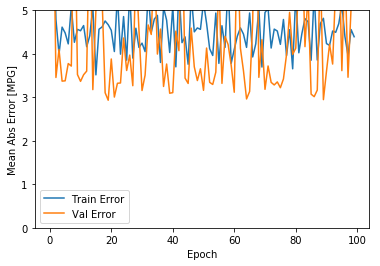

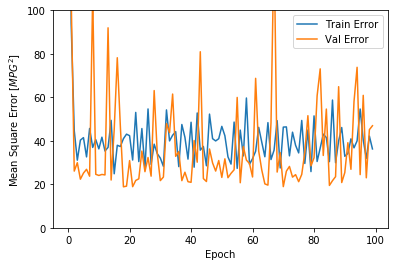

In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,100])
  plt.legend()
  plt.show()
plot_history(history)


..............

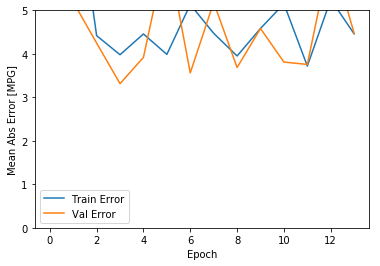

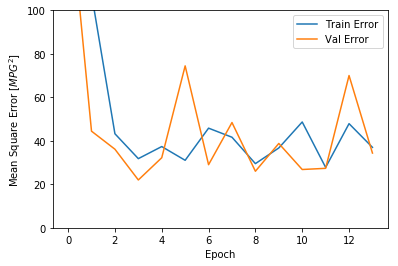

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=100,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  5.00 MPG


In [0]:
history.epoch[-1]

13

Comparison:

In the best model the train error and val error are almost same but after 20 epochs the train error and val error got to stabilize a bit. where as, when we compared to testing absolute mean error, it is almost same as tarin error and val error. 


when we compare all the validation errors with respect to different learning rates, we got best model for when we took learning rate as 0.1 and we need to run it. from the 43rd epoch onwards the loss isn't so much